In [1]:
# install PCV if your didn't use it before,the download address is: https://github.com/jesolem/PCV. 
# Download it and unzip it.Then in cmd console, you cd to the directory where you unzip and use the command: python setup.py install.
import os
import PIL.Image as Image
from PCV.clustering import hcluster
from matplotlib.pyplot import *
from numpy import *
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# create a list of images
# You should have all 10,000 images in crpto_punks folder under your work directory, otherwise you should run Collecting_cryptopunks first 
path = './crypto_punks'
imlist = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.png')]

['F:\\新加坡国立大学\\FE5225 Machine Learning and FinTech\\Group7\\crypto_punks\\0000.png',
 'F:\\新加坡国立大学\\FE5225 Machine Learning and FinTech\\Group7\\crypto_punks\\0001.png',
 'F:\\新加坡国立大学\\FE5225 Machine Learning and FinTech\\Group7\\crypto_punks\\0002.png',
 'F:\\新加坡国立大学\\FE5225 Machine Learning and FinTech\\Group7\\crypto_punks\\0003.png',
 'F:\\新加坡国立大学\\FE5225 Machine Learning and FinTech\\Group7\\crypto_punks\\0004.png',
 'F:\\新加坡国立大学\\FE5225 Machine Learning and FinTech\\Group7\\crypto_punks\\0005.png',
 'F:\\新加坡国立大学\\FE5225 Machine Learning and FinTech\\Group7\\crypto_punks\\0006.png',
 'F:\\新加坡国立大学\\FE5225 Machine Learning and FinTech\\Group7\\crypto_punks\\0007.png',
 'F:\\新加坡国立大学\\FE5225 Machine Learning and FinTech\\Group7\\crypto_punks\\0008.png',
 'F:\\新加坡国立大学\\FE5225 Machine Learning and FinTech\\Group7\\crypto_punks\\0009.png',
 'F:\\新加坡国立大学\\FE5225 Machine Learning and FinTech\\Group7\\crypto_punks\\0010.png',
 'F:\\新加坡国立大学\\FE5225 Machine Learning and FinTech\\Group7\\crypt

In [3]:
# Here you can change the number of images you want to cluster, if you use all the 10000, it may be very time-consuming
imlist = imlist[:100]
imlist

['F:\\新加坡国立大学\\FE5225 Machine Learning and FinTech\\Group7\\crypto_punks\\0000.png',
 'F:\\新加坡国立大学\\FE5225 Machine Learning and FinTech\\Group7\\crypto_punks\\0001.png',
 'F:\\新加坡国立大学\\FE5225 Machine Learning and FinTech\\Group7\\crypto_punks\\0002.png',
 'F:\\新加坡国立大学\\FE5225 Machine Learning and FinTech\\Group7\\crypto_punks\\0003.png',
 'F:\\新加坡国立大学\\FE5225 Machine Learning and FinTech\\Group7\\crypto_punks\\0004.png',
 'F:\\新加坡国立大学\\FE5225 Machine Learning and FinTech\\Group7\\crypto_punks\\0005.png',
 'F:\\新加坡国立大学\\FE5225 Machine Learning and FinTech\\Group7\\crypto_punks\\0006.png',
 'F:\\新加坡国立大学\\FE5225 Machine Learning and FinTech\\Group7\\crypto_punks\\0007.png',
 'F:\\新加坡国立大学\\FE5225 Machine Learning and FinTech\\Group7\\crypto_punks\\0008.png',
 'F:\\新加坡国立大学\\FE5225 Machine Learning and FinTech\\Group7\\crypto_punks\\0009.png',
 'F:\\新加坡国立大学\\FE5225 Machine Learning and FinTech\\Group7\\crypto_punks\\0010.png',
 'F:\\新加坡国立大学\\FE5225 Machine Learning and FinTech\\Group7\\crypt

In [4]:
# extract feature vector (8 bins per color channel)
features = zeros([len(imlist), 512])
for i, f in enumerate(imlist):
    im = array(Image.open(f))
    # multi-dimensional histogram
    h, edges = histogramdd(im.reshape(-1, 3), 8, normed=True, range=[(0, 255), (0, 255), (0, 255)])
    features[i] = h.flatten()
tree = hcluster.hcluster(features)

In [5]:
# clusters with some (arbitrary) threshold
clusters = tree.extract_clusters(0.23 * tree.distance)
N_clusters = len(clusters)
# see how many clusters by this condition
print(N_clusters)

54


E:\anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


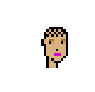

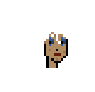

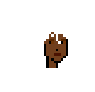

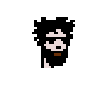

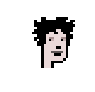

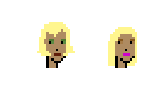

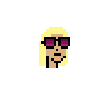

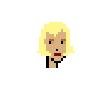

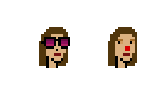

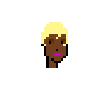

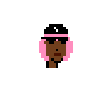

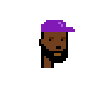

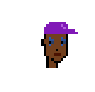

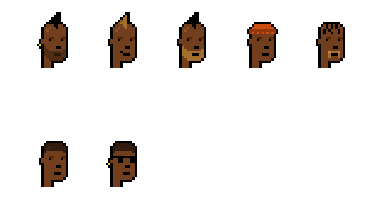

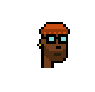

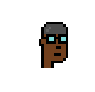

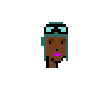

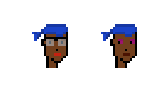

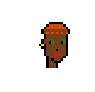

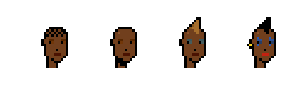

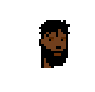

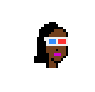

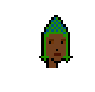

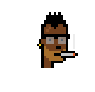

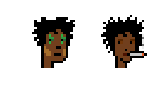

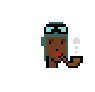

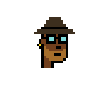

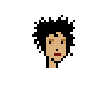

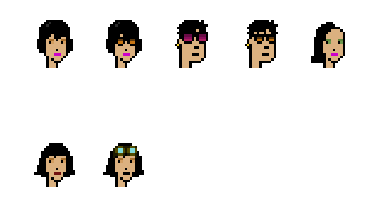

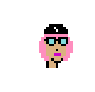

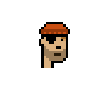

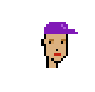

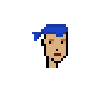

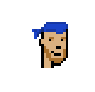

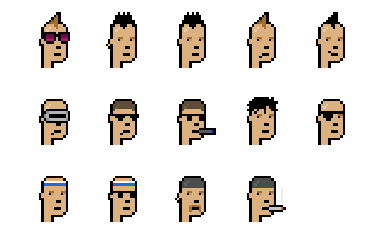

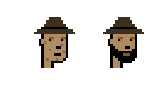

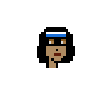

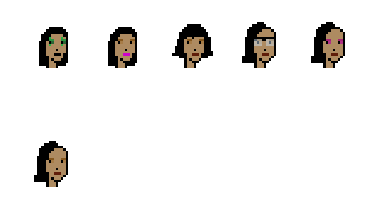

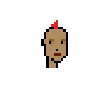

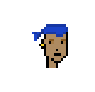

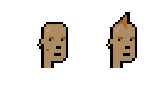

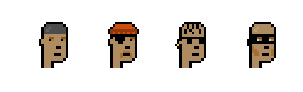

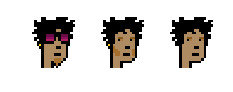

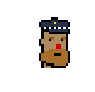

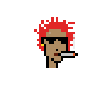

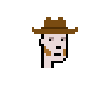

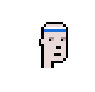

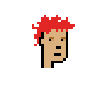

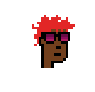

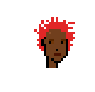

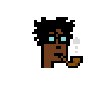

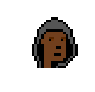

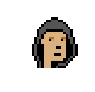

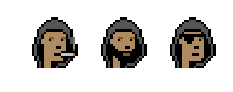

In [6]:
# visualize clusters with some (arbitrary) threshold
for c in clusters:
    elements = c.get_cluster_elements()
    nbr_elements = len(elements)
    figure()
    for p in range(nbr_elements):
        subplot((nbr_elements//5)+1, 5, p + 1)
        #print(elements[p])
        im = array(Image.open(imlist[elements[p]]))
        imshow(im)
        axis('off')
    #print("-------------------")
show()
 
#hcluster.draw_dendrogram(tree,imlist,filename='cryptopunks_cluster.pdf')

In [7]:
import re
import time

In [11]:
# note that it will scrape all the pictures and save them in your sys_path under "cryptopunks" folder
# it will take a long long time to download all of the 10000 pictures
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36'}
dict={}

for i in range(10000):
    url = "https://www.larvalabs.com/cryptopunks/details/"+str(i).zfill(4)
    res = requests.get(url,headers = headers)
    soup = BeautifulSoup(res.text,"html.parser")
    try:
        target = soup.select('tr[class="punk-history-row-bid"] td')
        price = re.split(r'[()]',str(target[3]))[1]
        dict[str(i)]= price
    except:
        price = "NaN"
        dict[str(i)]= price
    # too small time gap will make you IP banned by Larvalabs, however long time gap make you a lot of time to scrape
    time.sleep(1)

60,

['NaN']
-------------------
7,

['$551']
-------------------
25,

['NaN']
-------------------
15,

['$80,008']
-------------------
80,

['NaN']
-------------------
0,64,

['$160,973', 'NaN']
-------------------
13,

['$81,801']
-------------------
96,

['NaN']
-------------------
53,91,

['$77,772', 'NaN']
-------------------
12,

['$65']
-------------------
94,

['NaN']
-------------------
30,

['NaN']
-------------------
37,

['NaN']
-------------------
74,1,79,47,77,56,63,

['NaN', '$36,305', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
-------------------
52,

['$0']
-------------------
68,

['NaN']
-------------------
22,

['NaN']
-------------------
19,49,

['$470', 'NaN']
-------------------
86,

['NaN']
-------------------
31,89,10,62,

['NaN', 'NaN', '$45,336', 'NaN']
-------------------
8,

['$3,618']
-------------------
67,

['NaN']
-------------------
66,

['NaN']
-------------------
35,

['NaN']
-------------------
41,42,

['NaN', '$1']
-------------------
14,

['$64,905']
----

E:\anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


,21,71,61,98,

['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
-------------------
92,

['NaN']
-------------------
75,

['NaN']
-------------------
88,

['NaN']
-------------------
93,

['NaN']
-------------------
40,

['$14']
-------------------
48,27,33,17,24,32,39,83,44,55,57,81,23,76,

['$431', 'NaN', 'NaN', '$26', 'NaN', 'NaN', '$44', 'NaN', '$41,717', '$12,883', 'NaN', 'NaN', 'NaN', 'NaN']
-------------------
50,69,

['$119', 'NaN']
-------------------
65,

['NaN']
-------------------
11,46,26,29,5,43,

['NaN', 'NaN', 'NaN', 'NaN', '$1,613', '$86']
-------------------
36,

['NaN']
-------------------
73,

['NaN']
-------------------
45,95,

['NaN', 'NaN']
-------------------
6,78,16,18,

['$10,126', 'NaN', '$3,011', 'NaN']
-------------------
4,51,97,

['$621', '$0', 'NaN']
-------------------
9,

['$13,597']
-------------------
70,

['NaN']
-------------------
59,

['NaN']
-------------------
82,

['NaN']
-------------------
20,

['NaN']
-------------------
28,

['NaN']
-----

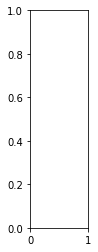

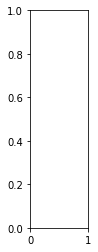

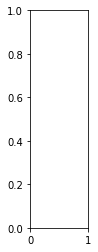

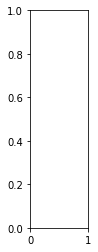

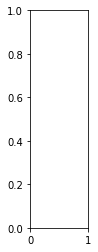

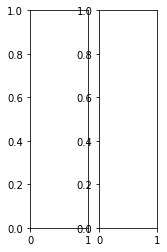

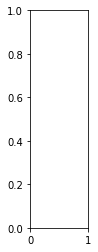

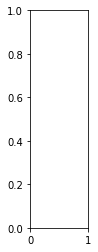

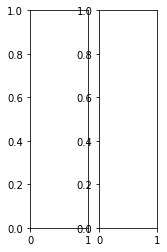

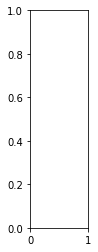

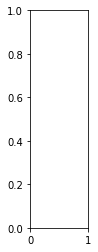

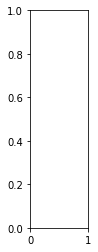

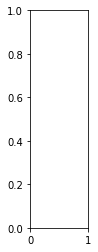

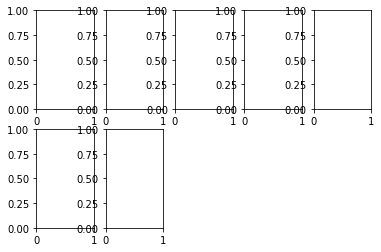

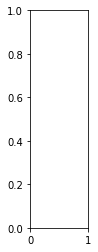

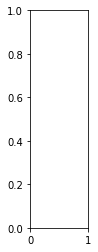

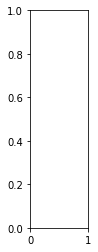

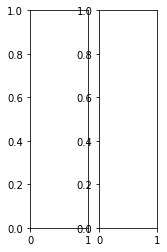

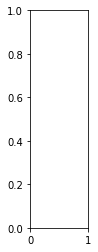

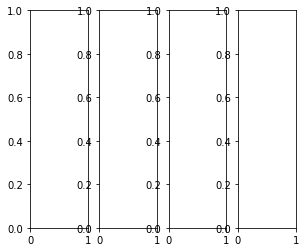

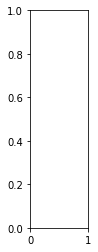

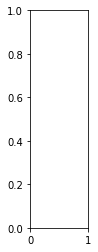

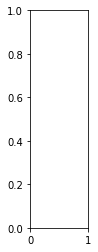

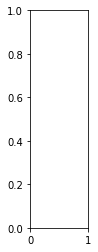

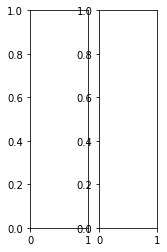

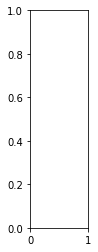

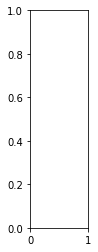

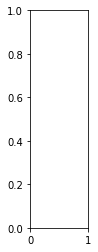

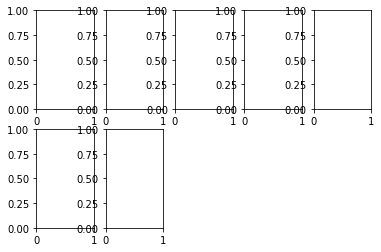

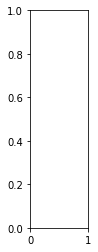

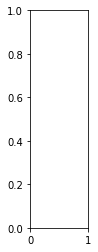

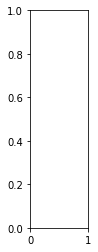

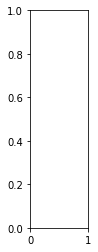

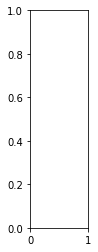

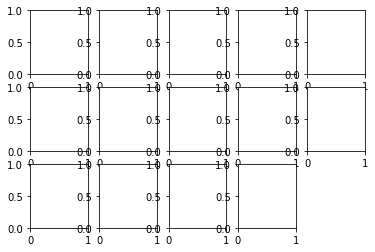

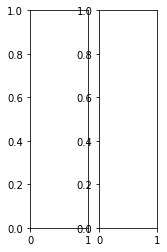

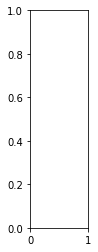

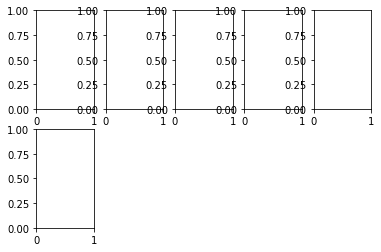

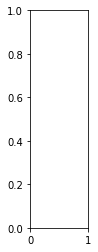

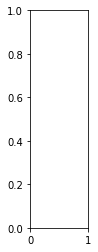

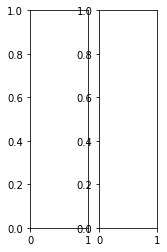

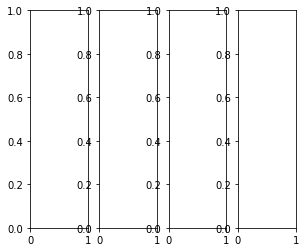

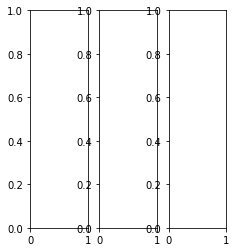

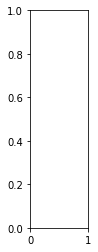

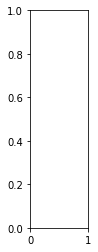

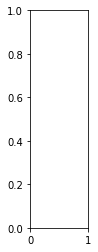

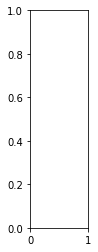

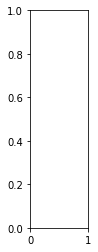

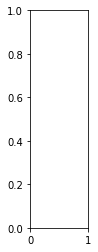

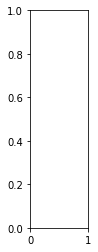

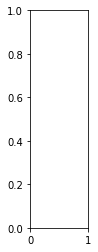

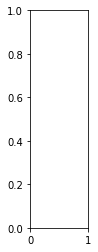

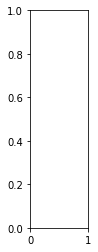

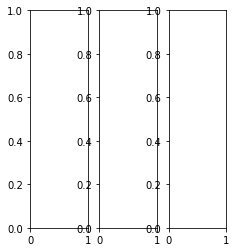

In [40]:
for c in clusters:
    elements = c.get_cluster_elements()
    nbr_elements = len(elements)
    figure()
    price = []
    for p in range(nbr_elements):
        subplot((nbr_elements//5)+1, 5, p + 1)
        print(elements[p],end = ",")
        p = dict[str(elements[p])]
        #if p != 'NaN':
        price.append(p)
    #print("The average price of this cluster is {:0.2f}".format(mean(price)))
    print("\n")
    print(price)
    print("-------------------")